In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
try:
  data=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
  display(data.head())
except:
  print("Error: '/content/drive/MyDrive/creditcard.csv' Not Found")
  data=None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
data.shape

(284807, 31)

# Data Exploration and Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
non_fraud=len(data[data.Class==0])
fraud=len(data[data.Class==1])
fraud_percent=(fraud/(fraud+non_fraud))*100
print("Number of Legit Transactions:", non_fraud)
print("Number of Fraud Transactions:", fraud)
print("Percentage of Fraud Transactions: {:.4f}".format(fraud_percent))

Number of Legit Transactions: 284315
Number of Fraud Transactions: 492
Percentage of Fraud Transactions: 0.1727


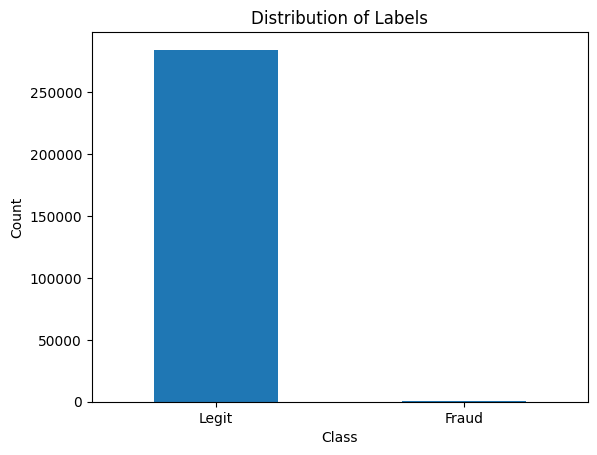

In [9]:
labels=["Legit", "Fraud"]
count_classes=data.value_counts(data["Class"], sort=True)
count_classes.plot(kind="bar", rot=0)
plt.title("Distribution of Labels")
plt.ylabel("Count")
plt.xticks(range(2),labels)
plt.show()

In [10]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
data.duplicated().sum()

np.int64(1081)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data["Class"].value_counts()

,count
Class,
0,283253
1,473


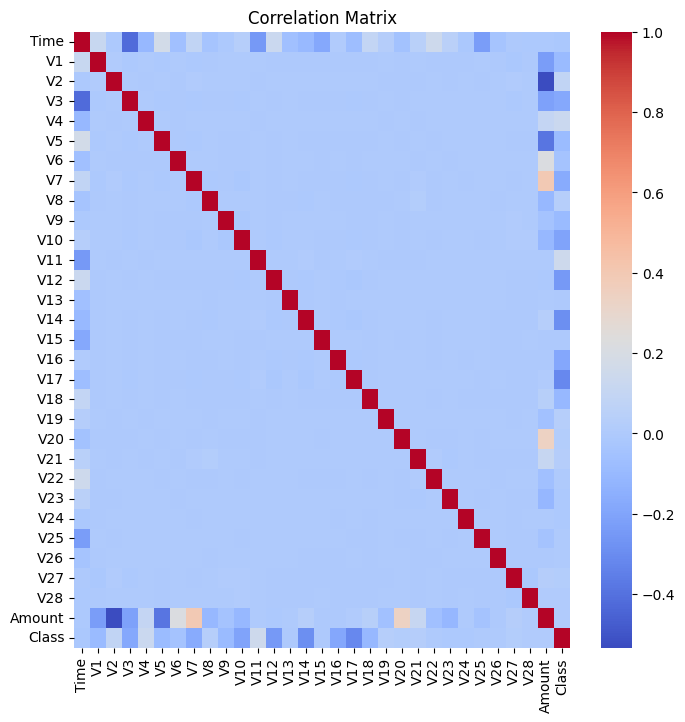

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

sclr=StandardScaler()
data["scaled_Amount"]=sclr.fit_transform(data["Amount"].values.reshape(-1,1))
data["scaled_Time"]=sclr.fit_transform(data["Time"].values.reshape(-1,1))

data.drop(["Amount", "Time"], axis=1, inplace=True)

In [17]:
from sklearn.model_selection import train_test_split

x=data.drop("Class", axis=1)
y=data["Class"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

# SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

x_train_resampled, y_train_resampled= smote.fit_resample(x_train, y_train)

print("Before Resampled:")
print(y_train.value_counts())
print("After Resampled with SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before Resampled:
Class
0    226602
1       378
Name: count, dtype: int64
After Resampled with SMOTE:
Class
0    226602
1    226602
Name: count, dtype: int64


# Logistig Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

log_reg= LogisticRegression(random_state=42)
log_reg.fit(x_train_resampled, y_train_resampled)


LogisticRegression(random_state=42)

In [20]:
y_pred_Test=log_reg.predict(x_test)
y_pred_Train=log_reg.predict(x_train_resampled)


In [21]:
print("\nAccuracy Score:")

print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_pred_Train)}")

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_Test)}")


Accuracy Score:
Train Accuracy: 0.9478005489801502
Test Accuracy: 0.9737250202657456


In [22]:
print("\nRecall Score:")

print(f"Train Recall: {recall_score(y_train_resampled, y_pred_Train)}")

print(f"Test Recall: {recall_score(y_test, y_pred_Test)}")


Recall Score:
Train Recall: 0.920940680135215
Test Recall: 0.8736842105263158


In [23]:
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_Test))


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746




Confusion Matrix for Logistic Regression:


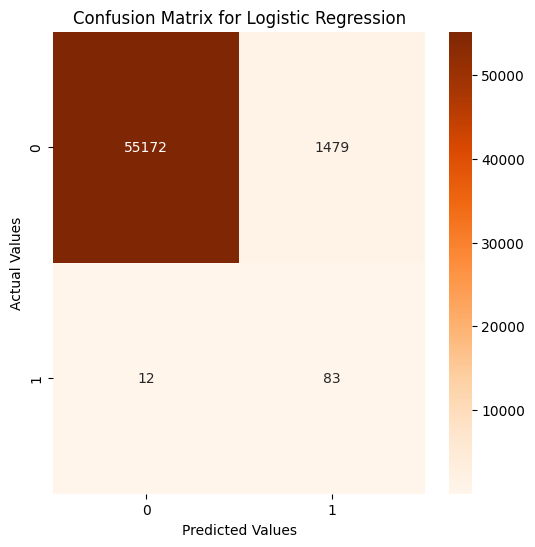

In [24]:
print("\nConfusion Matrix for Logistic Regression:")
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_Test), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdf=RandomForestClassifier(random_state=42)
rdf.fit(x_train_resampled, y_train_resampled)

y_pred_test_rdf=rdf.predict(x_test)
y_pred_train_rdf=rdf.predict(x_train_resampled)


Accuracy Score (Random Forest):
Train Accuracy: 1.0
Test Accuracy: 0.9994889507630493

Recall Score (Random Forest):
Train Recall: 1.0
Test Recall: 0.7578947368421053

Classification Report (Random Forest Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.76      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Confusion Matrix for Random Forest:


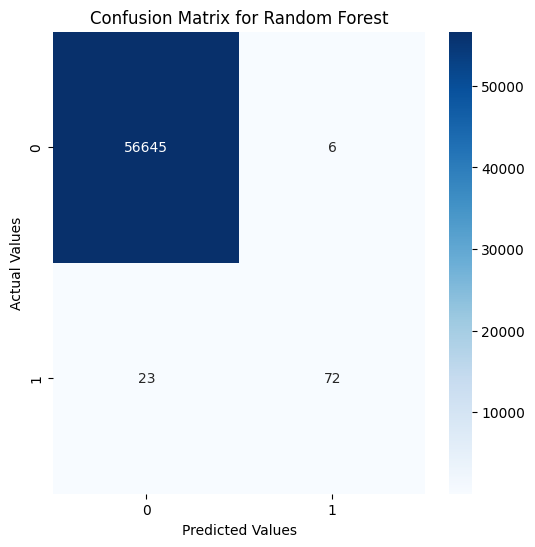

In [ ]:
print("\nAccuracy Score (Random Forest):")
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_pred_train_rdf)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test_rdf)}")

print("\nRecall Score (Random Forest):")
print(f"Train Recall: {recall_score(y_train_resampled, y_pred_train_rdf)}")
print(f"Test Recall: {recall_score(y_test, y_pred_test_rdf)}")

print("\nClassification Report (Random Forest Test):")
print(classification_report(y_test,y_pred_test_rdf))

print("\nConfusion Matrix for Random Forest:")
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rdf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb=XGBClassifier(random_state=42)
xgb.fit(x_train_resampled, y_train_resampled)

y_pred_test_xgb=xgb.predict(x_test)
y_pred_train_xgb=xgb.predict(x_train_resampled)


Accuracy Score (XGBoost):
Train Accuracy: 1.0
Test Accuracy:0.9992069925633524

Recall Score (XGBoost):
Train Recall:1.0
Test Recall:0.7894736842105263

Classification Report (XGBoost Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.75      0.79      0.77        95

    accuracy                           1.00     56746
   macro avg       0.87      0.89      0.88     56746
weighted avg       1.00      1.00      1.00     56746


Confusion Matrix for XGBoost:


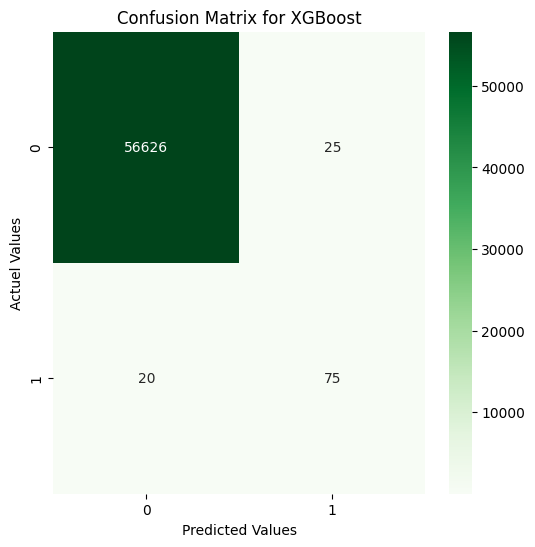

In [ ]:
print("\nAccuracy Score (XGBoost):")
print(f"Train Accuracy: {accuracy_score(y_train_resampled,y_pred_train_xgb)}")
print(f"Test Accuracy:{accuracy_score(y_test,y_pred_test_xgb)}")

print("\nRecall Score (XGBoost):")
print(f"Train Recall:{recall_score(y_train_resampled, y_pred_train_xgb)}")
print(f"Test Recall:{recall_score(y_test,y_pred_test_xgb)}")

print("\nClassification Report (XGBoost Test):")
print(classification_report(y_test,y_pred_test_xgb))

print("\nConfusion Matrix for XGBoost:")
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_test_xgb), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted Values")
plt.ylabel("Actuel Values")
plt.show()

# Comparison of Metrics

In [ ]:
results={
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Train Accuracy":[
        accuracy_score(y_train_resampled,y_pred_Train),
        accuracy_score(y_train_resampled,y_pred_train_rdf),
        accuracy_score(y_train_resampled,y_pred_train_xgb)
    ],
    "Test Accuracy":[
        accuracy_score(y_test,y_pred_Test),
        accuracy_score(y_test,y_pred_test_rdf),
        accuracy_score(y_test,y_pred_test_xgb)
    ],
    "Train Recall":[
        recall_score(y_train_resampled,y_pred_Train),
        recall_score(y_train_resampled,y_pred_train_rdf),
        recall_score(y_train_resampled,y_pred_train_xgb)
    ],
    "Test Recall":[
        recall_score(y_test,y_pred_Test),
        recall_score(y_test,y_pred_test_rdf),
        recall_score(y_test,y_pred_test_xgb)
    ],
    "Test Precision":[
        classification_report(y_test,y_pred_Test, output_dict=True)["1"]["precision"],
        classification_report(y_test,y_pred_test_rdf, output_dict=True)["1"]["precision"],
        classification_report(y_test,y_pred_test_xgb, output_dict=True)["1"]["precision"]
    ],
    "Test F1-Score":[
        classification_report(y_test,y_pred_Test, output_dict=True)["1"]["f1-score"],
        classification_report(y_test,y_pred_test_rdf, output_dict=True)["1"]["f1-score"],
        classification_report(y_test,y_pred_test_xgb,output_dict=True)["1"]["f1-score"]
    ]
}

results_df=pd.DataFrame(results)
display(results_df)

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Test Precision,Test F1-Score
0,Logistic Regression,0.947801,0.973725,0.920941,0.873684,0.053137,0.100181
1,Random Forest,1.000000,0.999489,1.000000,0.757895,0.923077,0.832370
2,XGBoost,1.000000,0.999207,1.000000,0.789474,0.750000,0.769231


In [ ]:
results_melted=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

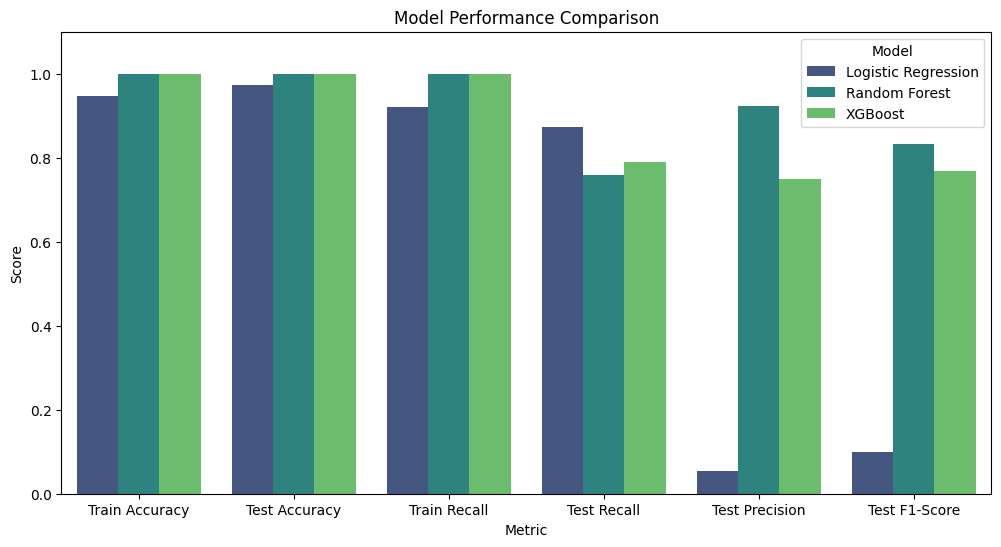

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Metric", y="Score", hue="Model", data=results_melted, palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1.1)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
y_prob_test_log_reg=log_reg.predict_proba(x_test)[:,1]
y_prob_test_rdf=rdf.predict_proba(x_test)[:,1]
y_prob_test_xgb=xgb.predict_proba(x_test)[:,1]

In [ ]:
fpr_log_reg,tpr_log_reg,_=roc_curve(y_test,y_prob_test_log_reg)
roc_auc_log_reg=auc(fpr_log_reg,tpr_log_reg)

fpr_rdf,tpr_rdf,_=roc_curve(y_test,y_prob_test_rdf)
roc_auc_rdf=auc(fpr_rdf,tpr_rdf)

fpr_xgb,tpr_xgb,_=roc_curve(y_test,y_prob_test_xgb)
roc_auc_xgb=auc(fpr_xgb,tpr_xgb)


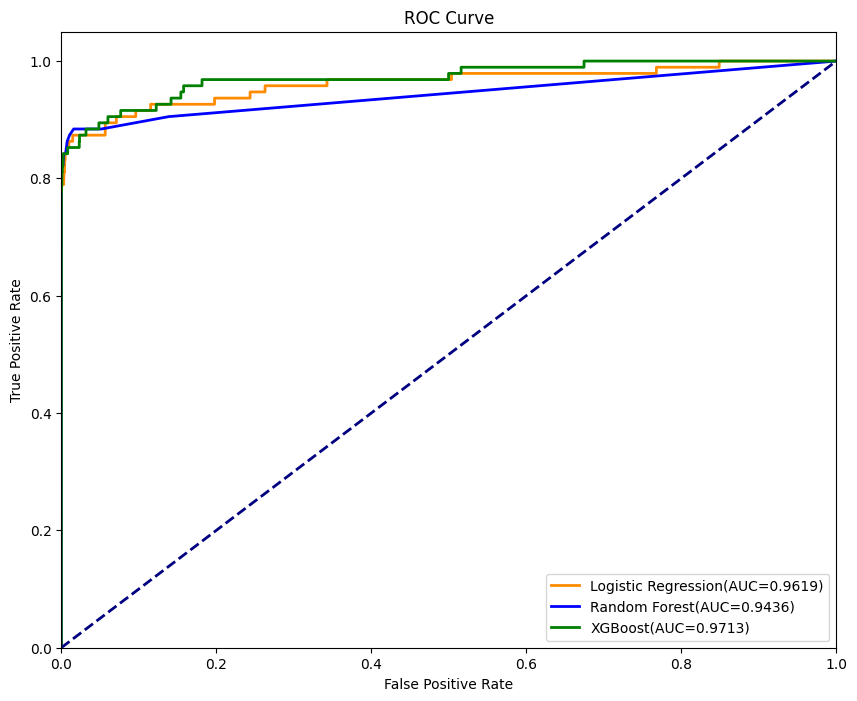

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(fpr_log_reg,tpr_log_reg,color="darkorange", lw=2, label=f"Logistic Regression(AUC={roc_auc_log_reg:.4f})")
plt.plot(fpr_rdf,tpr_rdf,color="blue", lw=2, label=f"Random Forest(AUC={roc_auc_rdf:.4f})")
plt.plot(fpr_xgb,tpr_xgb,color="green", lw=2, label=f"XGBoost(AUC={roc_auc_xgb:.4f})")
plt.plot([0,1],[0,1],color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()